# Support Vector Machine (SVM) SVR 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Carga de datos

In [17]:
df = pd.read_csv('data/Finaltrain.csv')
df.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,346,61,0,3,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,1225,203,3,29,79
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,345,60,0,9,24
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,451,76,0,10,33
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,145,27,0,2,10


In [18]:
X = df[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']]
y_content = df['content']
y_wording = df['wording']


### División en conjuntos de entrenamiento y prueba


In [19]:
X_train, X_test, y_content_train, y_content_test = train_test_split(X, y_content, test_size=0.2, random_state=42)
X_train, X_test, y_wording_train, y_wording_test = train_test_split(X, y_wording, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implementación de grid search

In [21]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

### Entrenamiento para content

In [22]:
svr_content = SVR()
grid_search_content = GridSearchCV(svr_content, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_content.fit(X_train_scaled, y_content_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

### Predicción para content

In [23]:
best_svr_content = grid_search_content.best_estimator_
print(f"Best Estimator for content: {best_svr_content}")

y_content_pred = best_svr_content.predict(X_test_scaled)

mse_content = mean_squared_error(y_content_test, y_content_pred)
print(f"MSE for content score: {mse_content}")

Best Estimator for content: SVR(C=10, gamma='auto')
MSE for content score: 0.26390369387377816


### Entrenamiento para wording

In [24]:
svr_wording = SVR()
grid_search_wording = GridSearchCV(svr_wording, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_wording.fit(X_train_scaled, y_wording_train)

best_svr_wording = grid_search_wording.best_estimator_
print(f"Best Estimator for wording: {best_svr_wording}")

Best Estimator for wording: SVR(C=1, gamma='auto')


### Predicción para wording

In [25]:
y_wording_pred = best_svr_wording.predict(X_test_scaled)

mse_wording = mean_squared_error(y_wording_test, y_wording_pred)
print(f"MSE for wording score: {mse_wording}")

MSE for wording score: 0.5933843949267475


In [26]:
print(f"R^2 for content score: {best_svr_content.score(X_test_scaled, y_content_test)}")
print(f"R^2 for wording score: {best_svr_wording.score(X_test_scaled, y_wording_test)}")

R^2 for content score: 0.756297991131877
R^2 for wording score: 0.4169006175004891


In [27]:
# mae
print(f"MAE for content score: {np.mean(np.abs(y_content_test - y_content_pred))}")
print(f"MAE for wording score: {np.mean(np.abs(y_wording_test - y_wording_pred))}")

MAE for content score: 0.37981927396425696
MAE for wording score: 0.584024445208726


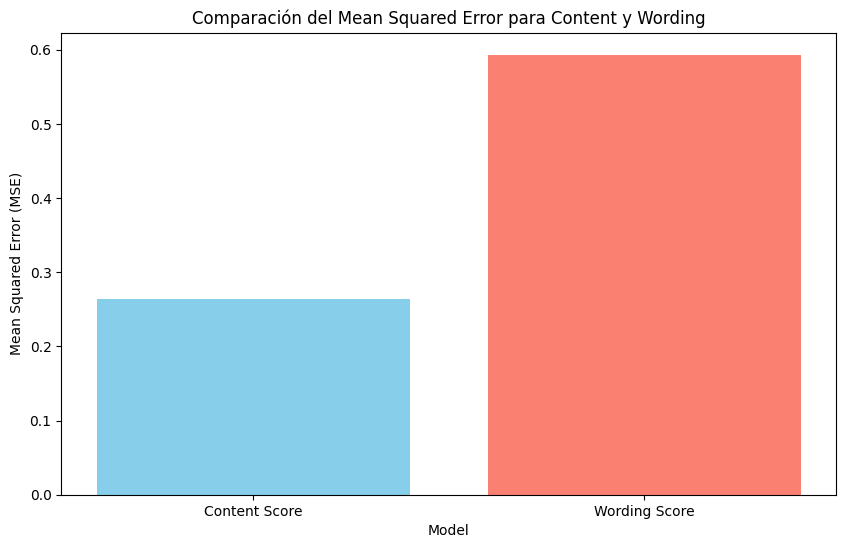

In [28]:
import matplotlib.pyplot as plt

mse_values = [mse_content, mse_wording]
labels = ['Content Score', 'Wording Score']

plt.figure(figsize=(10, 6))
plt.bar(labels, mse_values, color=['skyblue', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparación del Mean Squared Error para Content y Wording')
plt.show()

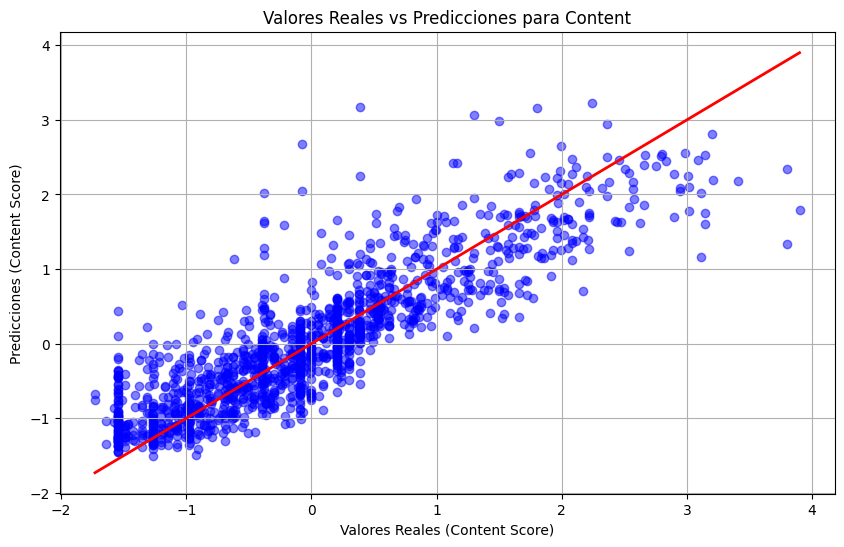

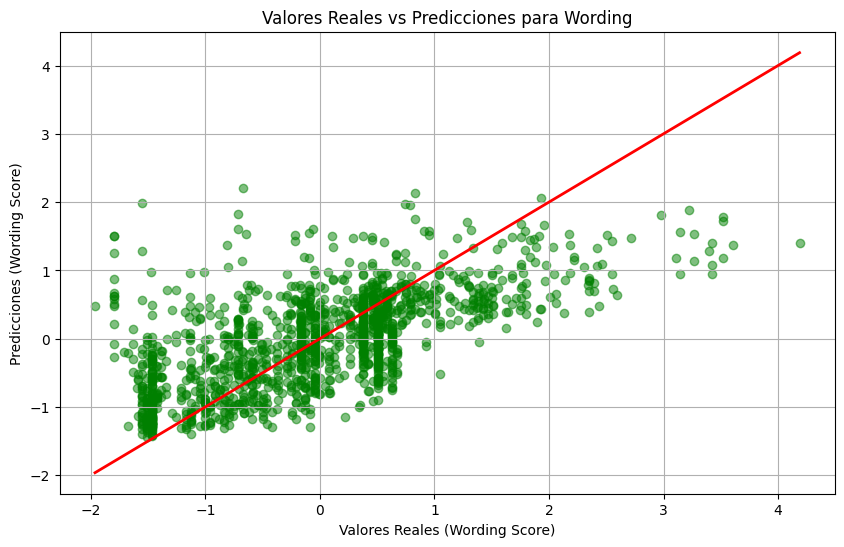

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_content_test, y_content_pred, alpha=0.5, color='blue')
plt.plot([y_content_test.min(), y_content_test.max()], [y_content_test.min(), y_content_test.max()], color='red', lw=2)
plt.xlabel('Valores Reales (Content Score)')
plt.ylabel('Predicciones (Content Score)')
plt.title('Valores Reales vs Predicciones para Content')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_wording_test, y_wording_pred, alpha=0.5, color='green')
plt.plot([y_wording_test.min(), y_wording_test.max()], [y_wording_test.min(), y_wording_test.max()], color='red', lw=2)
plt.xlabel('Valores Reales (Wording Score)')
plt.ylabel('Predicciones (Wording Score)')
plt.title('Valores Reales vs Predicciones para Wording')
plt.grid(True)
plt.show()


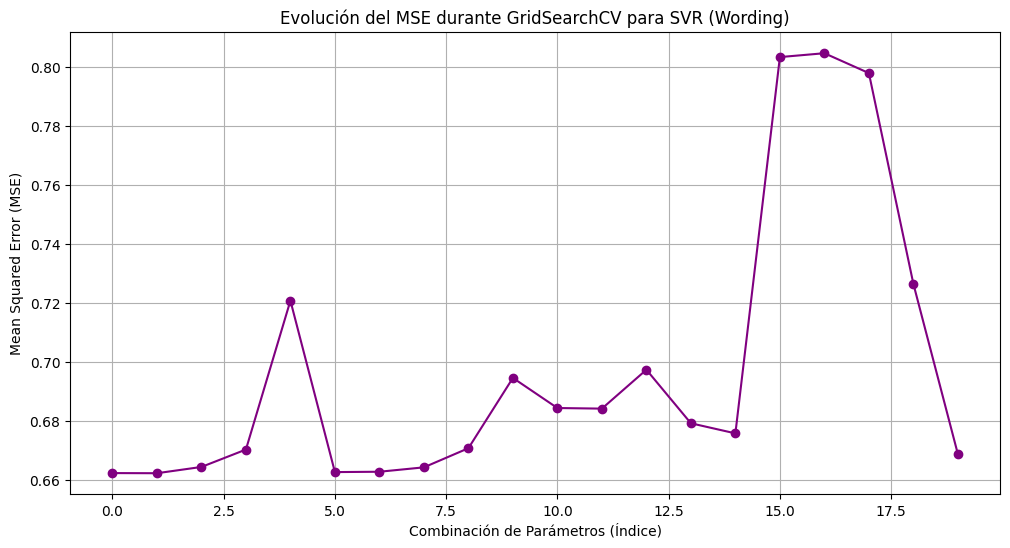

In [30]:
cv_results_wording = grid_search_wording.cv_results_

mean_test_scores = cv_results_wording['mean_test_score']
mean_test_errors = -mean_test_scores  # Convertir el error a positivo

plt.figure(figsize=(12, 6))
plt.plot(range(len(mean_test_errors)), mean_test_errors, marker='o', linestyle='-', color='purple')
plt.xlabel('Combinación de Parámetros (Índice)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Evolución del MSE durante GridSearchCV para SVR (Wording)')
plt.grid(True)
plt.show()

In [ ]:
import joblib

# Guardar el modelo de 'content'
joblib.dump(best_svr_content, 'best_svr_content_model.pkl')

# Guardar el modelo de 'wording'
joblib.dump(best_svr_wording, 'best_svr_wording_model.pkl')